In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#first exp: use MNIST
from keras.datasets import fashion_mnist

np.random.seed(25)

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Plot a few images of each digit

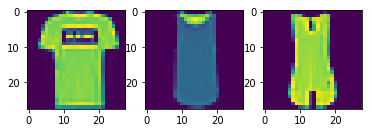

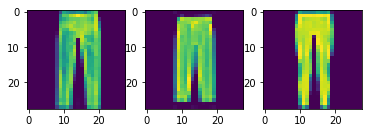

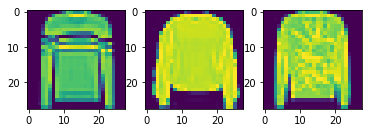

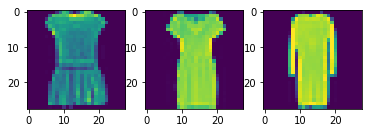

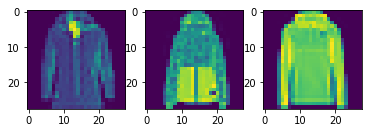

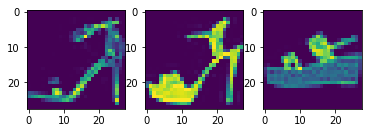

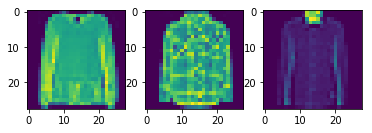

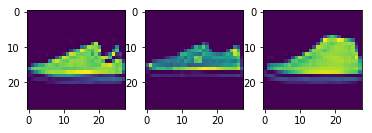

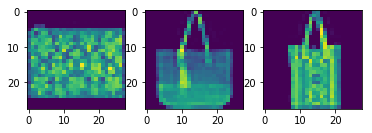

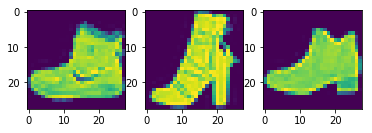

In [7]:
import matplotlib.pyplot as plt
PLOT=3
for i in np.unique(y_train):
    fig,ax=plt.subplots(nrows=1,ncols=PLOT)
    num=X_train[np.where(y_train==i)[:PLOT]]
    for j in range(PLOT):
        ax[j].imshow(num[j])

Preprocess and normalize the input data to [0, 1], and one hot encoder for label.

In [8]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

X_train = X_train / 255
X_test = X_test / 255

In [10]:
Y_train=np_utils.to_categorical(y_train,len(np.unique(y_train)))
Y_test=np_utils.to_categorical(y_test,len(np.unique(y_train)))

print(Y_train[:10,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [11]:
model=Sequential()
model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  app.launch_new_instance()


Define the loss function and the optimizer

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.5028 - acc: 0.8210
Epoch 2/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.3360 - acc: 0.8790
Epoch 3/5
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2863 - acc: 0.8951
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2581 - acc: 0.9067
Epoch 5/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.2361 - acc: 0.9123


In [10]:
model